## Scrape Web Data with Pandas

#### Using the `read_html` method

In [1]:
import pandas as pd
import numpy as np

### HTML Table Example

<table>
  <tr>
    <td>Name</td>
    <td>Knocky</td>
    <td>Flor</td>
    <td>Ella</td>
    <td>Juan</td>
  </tr>
  <tr>
    <td>Breed</td>
    <td>Jack Russell</td>
    <td>Poodle</td>
    <td>Streetdog</td>
    <td>Cocker Spaniel</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>16</td>
    <td>9</td>
    <td>10</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Owner</td>
    <td>Mother-in-law</td>
    <td>Me</td>
    <td>Me</td>
    <td>Sister-in-law</td>
  </tr>
  <tr>
    <td>Eating Habits</td>
    <td>Eats everyone's leftovers</td>
    <td>Nibbles at food</td>
    <td>Hearty eater</td>
    <td>Will eat till he explodes</td>
  </tr>
</table>

In [2]:
# convert the html list into a python sting

html_string = """
<table>
  <tr>
    <td>Name</td>
    <td>Knocky</td>
    <td>Flor</td>
    <td>Ella</td>
    <td>Juan</td>
  </tr>
  <tr>
    <td>Breed</td>
    <td>Jack Russell</td>
    <td>Poodle</td>
    <td>Streetdog</td>
    <td>Cocker Spaniel</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>16</td>
    <td>9</td>
    <td>10</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Owner</td>
    <td>Mother-in-law</td>
    <td>Me</td>
    <td>Me</td>
    <td>Sister-in-law</td>
  </tr>
  <tr>
    <td>Eating Habits</td>
    <td>Eats everyone's leftovers</td>
    <td>Nibbles at food</td>
    <td>Hearty eater</td>
    <td>Will eat till he explodes</td>
  </tr>
</table>

"""

In [3]:
pd.read_html(html_string)

[               0                          1                2             3  \
 0           Name                     Knocky             Flor          Ella   
 1          Breed               Jack Russell           Poodle     Streetdog   
 2            Age                         16                9            10   
 3          Owner              Mother-in-law               Me            Me   
 4  Eating Habits  Eats everyone's leftovers  Nibbles at food  Hearty eater   
 
                            4  
 0                       Juan  
 1             Cocker Spaniel  
 2                          5  
 3              Sister-in-law  
 4  Will eat till he explodes  ]

In [4]:
# read html method always returns a list
dfs = pd.read_html(html_string)
type(dfs)

list

In [5]:
# this list consists of pandas DataFrame objects
type(dfs[0])

pandas.core.frame.DataFrame

### Pull table data from Wikipedia

- Target Table: Season's Bests Table 
- Source: `https://en.wikipedia.org/wiki/100_metres`

In [6]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/100_metres')
len(dfs)

25

- There are a total of 25 tables in the newly created data. 
- Need to go through each table to find the Season's Bests Table

In [7]:
# random table sample

dfs[2]

,Ath.#,Perf.#,Time (s),Wind (m/s),Athlete,Nation,Date,Place,Ref.
0,1.0,1.0,9.58,+0.9,Usain Bolt,Jamaica,16 AUG 2009,Berlin,[26]
1,NaN,2.0,9.63,+1.5,Bolt #2,NaN,05 AUG 2012,London,NaN
2,NaN,3.0,9.69,±0.0,Bolt #3,NaN,16 AUG 2008,Beijing,NaN
3,2.0,3.0,9.69,+2.0,Tyson Gay,United States,20 SEP 2009,Shanghai,[27]
4,2.0,3.0,9.69,−0.1,Yohan Blake,Jamaica,23 AUG 2012,Lausanne,[28]
5,NaN,6.0,9.71,+0.9,Gay #2,NaN,16 AUG 2009,Berlin,[26]
6,NaN,7.0,9.72,+1.7,Bolt #4,NaN,31 MAY 2008,New York City,NaN
7,4.0,7.0,9.72,+0.2,Asafa Powell,Jamaica,02 SEP 2008,Lausanne,[29]
8,NaN,9.0,9.74,+1.7,Powell #2,NaN,09 SEP 2007,Rieti,NaN
9,5.0,9.0,9.74,+0.9,Justin Gatlin,United States,15 MAY 2015,Doha,[30]


In [8]:
mens100m = dfs[5]
womens100m = dfs[6]

In [9]:
mens100m

,Year,Time,Athlete,Place
0,1972,10.07,Valeriy Borzov (URS),Munich
1,1973,10.15,Steve Williams (USA),Dakar
2,1974,9.9h,Steve Williams (USA),Los Angeles
3,1975,10.05,Steve Riddick (USA),Zürich
4,1976,10.06,Hasely Crawford (TRI),Montreal
5,1977,9.98[A],Silvio Leonard (CUB),Guadalajara
6,1978,10.07,Clancy Edwards (USA),Eugene
7,1978,10.07[A],Eddie Hart (USA),Colorado Springs
8,1978,10.07,Steve Williams (USA),Zürich
9,1979,10.01[A],Pietro Mennea (ITA),Mexico City


In [10]:
womens100m

,Year,Time,Athlete,Place
0,1972,11.07,Renate Stecher (GDR),Munich
1,1973,11.07,Renate Stecher (GDR),Dresden
2,1974,11.13,Irena Szewinska (POL),Rome
3,1975,11.13,Renate Stecher (GDR),Dresden
4,1976,11.01,Annegret Richter (FRG),Montreal
5,1977,10.88,Marlies Göhr (GDR),Dresden
6,1978,10.94,Marlies Göhr (GDR),Dresden
7,1979,10.97,Marlies Göhr (GDR),Dresden
8,1979,10.97,Evelyn Ashford (USA),Walnut
9,1980,10.93,Marlies Göhr (GDR),Dresden


In [11]:
# check the column names
mens100m.columns

Index(['Year', 'Time', 'Athlete', 'Place'], dtype='object')

### Clean Up the data

- Issues with `Time` column in `mens100m` table:
    - 1. Time column has `[A]` character, which is a link to a reference in the Wikipedia page
    - 2. Strip out `h` from Time 
    - 3. Cast as `numeric type`
    <br>
- Additional issues with `Time` column in `womens100m` table:
    - 4. Time column has `[a]` character in addition to `[A]`

In [12]:
mens100m['Time']

0        10.07
1        10.15
2         9.9h
3        10.05
4        10.06
5      9.98[A]
6        10.07
7     10.07[A]
8        10.07
9     10.01[A]
10       10.02
11       10.00
12       10.00
13     9.93[A]
14        9.96
15        9.98
16       10.00
17        9.93
18        9.92
19        9.94
20        9.96
21     9.96[A]
22        9.86
23        9.93
24        9.87
25        9.85
26        9.91
27        9.84
28        9.86
29        9.86
30        9.86
31        9.79
32        9.86
33        9.82
34        9.89
35        9.93
36        9.85
37        9.77
38        9.77
39        9.77
40        9.74
41        9.69
42        9.58
43        9.78
44        9.78
45        9.76
46        9.63
47        9.77
48        9.77
49        9.74
50        9.80
51        9.82
52        9.79
53        9.76
54        9.86
55     9.76[A]
56        9.76
Name: Time, dtype: object

In [13]:
mens100m['Time'] = mens100m['Time'].astype(str).str.replace('[A]', '', regex=False)\
    .str.replace('h', '', regex=False)

# conver to numeric type
mens100m['Time'] = pd.to_numeric(mens100m['Time'])

mens100m['Time']

0     10.07
1     10.15
2      9.90
3     10.05
4     10.06
5      9.98
6     10.07
7     10.07
8     10.07
9     10.01
10    10.02
11    10.00
12    10.00
13     9.93
14     9.96
15     9.98
16    10.00
17     9.93
18     9.92
19     9.94
20     9.96
21     9.96
22     9.86
23     9.93
24     9.87
25     9.85
26     9.91
27     9.84
28     9.86
29     9.86
30     9.86
31     9.79
32     9.86
33     9.82
34     9.89
35     9.93
36     9.85
37     9.77
38     9.77
39     9.77
40     9.74
41     9.69
42     9.58
43     9.78
44     9.78
45     9.76
46     9.63
47     9.77
48     9.77
49     9.74
50     9.80
51     9.82
52     9.79
53     9.76
54     9.86
55     9.76
56     9.76
Name: Time, dtype: float64

In [14]:
womens100m['Time'] = womens100m['Time'].astype(str).str.replace('[A]', '', regex=False)\
    .str.replace('h', '', regex=False)\
    .str.replace('[a]', '', regex=False)

# convert to numeric type
womens100m['Time'] = pd.to_numeric(womens100m['Time'])

womens100m['Time']

0     11.07
1     11.07
2     11.13
3     11.13
4     11.01
5     10.88
6     10.94
7     10.97
8     10.97
9     10.93
10    10.90
11    10.88
12    10.79
13    10.76
14    10.86
15    10.88
16    10.86
17    10.86
18    10.49
19    10.78
20    10.78
21    10.79
22    10.80
23    10.82
24    10.82
25    10.82
26    10.77
27    10.84
28    10.74
29    10.76
30    10.65
31    10.70
32    10.78
33    10.82
34    10.91
35    10.86
36    10.77
37    10.84
38    10.82
39    10.89
40    10.78
41    10.78
42    10.64
43    10.78
44    10.70
45    10.70
46    10.71
47    10.80
48    10.74
49    10.70
50    10.71
51    10.85
52    10.85
53    10.71
54    10.85
55    10.54
56    10.62
Name: Time, dtype: float64

### Plot the Data

In [15]:
import matplotlib.pyplot as plt
# set the style sheet for the plot
plt.style.use('ggplot')

In [16]:
# create a new Name column composing of Year and the Athlete's Name
mens100m['Name'] = mens100m['Year'].astype(str) + ': ' + mens100m['Athlete']

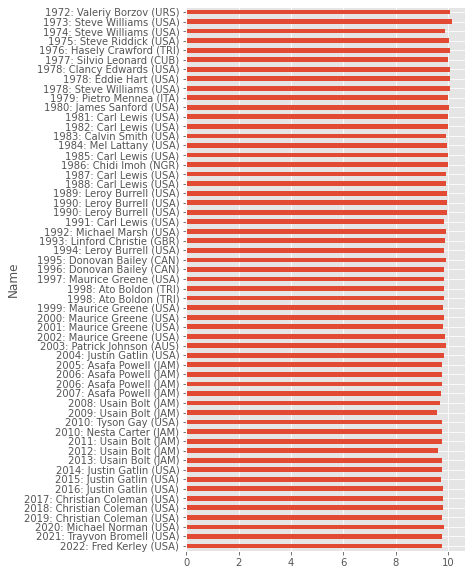

In [17]:
ax = mens100m.sort_values('Year', ascending=False) \
    .set_index('Name')['Time'].plot(kind='barh', figsize=(5, 10))

plt.show()

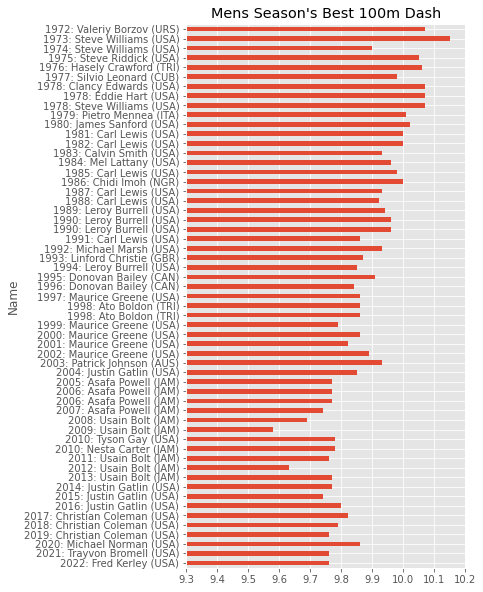

In [18]:
ax = mens100m.sort_values('Year', ascending=False) \
    .set_index('Name')['Time'].plot(kind='barh', figsize=(5, 10))


# set the xlimit since the times are so close to each other
ax.set_xlim(9.3, 10.2)

# set title
ax.set_title("Mens Season's Best 100m Dash")

plt.show()

### Plot Womens Data

In [19]:
# create the 'Name' column for womens data
womens100m['Name'] = womens100m['Year'].astype(str) + ': ' + womens100m['Athlete']

In [20]:
# to import color pallete to change the color for womens plot
# install first
%pip install seaborn --quiet # surpress the output

Note: you may need to restart the kernel to use updated packages.


In [21]:
import seaborn
color_pal = seaborn.color_palette()

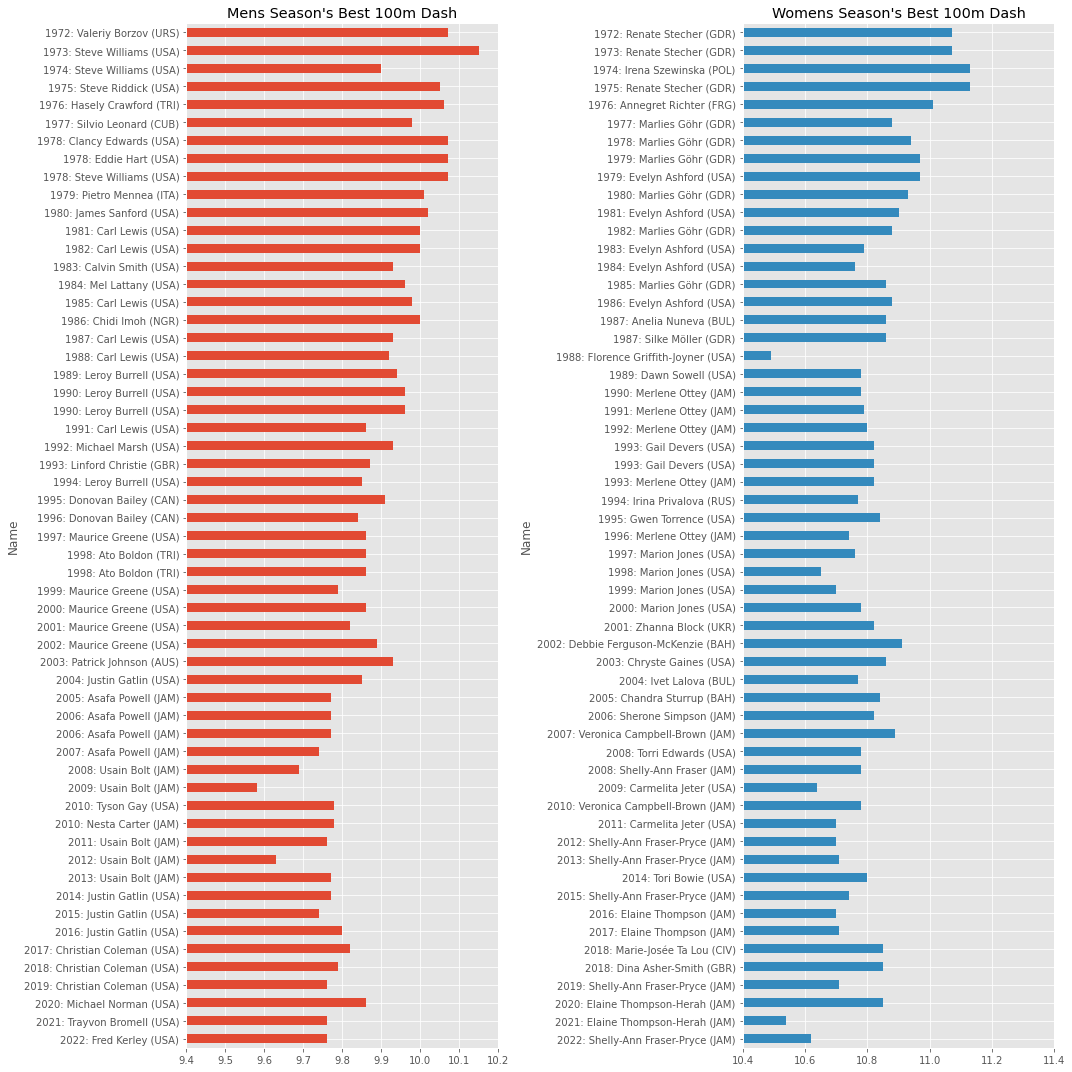

In [22]:
# display both plots together

fig, axs = plt.subplots(1, 2, figsize=(15, 15))

mens100m.sort_values('Year', ascending=False) \
    .set_index('Name')['Time'].plot(kind='barh', ax=axs[0])
ax = axs[0].set_xlim(9.4, 10.2)
ax = axs[0].set_title("Mens Season's Best 100m Dash")


womens100m.sort_values('Year', ascending=False) \
    .set_index('Name')['Time'].plot(kind='barh', ax=axs[1], color= color_pal[1])
# adjust the range
ax = axs[1].set_xlim(10.4, 11.4)
ax = axs[1].set_title("Womens Season's Best 100m Dash")

# fit the layout
plt.tight_layout()

plt.show()

### Save output to csv for future use

In [23]:
mens100m.to_csv('./data/cleaned/mens100m.csv', index=False)
womens100m.to_csv('./data/cleaned/womens100m.csv', index=False)